In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import cv2
import tarfile
import os
import random

In [4]:
#with tarfile.open('PKLot.tar', 'r') as tar:
#    tar.extractall()

## Using PIL library

In [28]:
# Have a look at the images
img_path = '../data/PKLot/PKLot/PUCPR/Sunny/2012-09-11/'

imge = '2012-09-11_17_35_44.jpg'
imge_xml = '2012-09-11_17_35_44.xml'

img = Image.open(img_path+imge)

In [29]:
''' 
# Display information about the image
print(f"Image format: {img.format}")
print(f"Image mode: {img.mode}")
print(f"Image size: {img.size}")

# Show the image
img.show()

'''

' \n# Display information about the image\nprint(f"Image format: {img.format}")\nprint(f"Image mode: {img.mode}")\nprint(f"Image size: {img.size}")\n\n# Show the image\nimg.show()\n\n'

In [56]:
def show_image(image, title = 'Title'):
    plt.figure(figsize=(10,8))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [40]:
def view_image(image_path, title = 'Title'):
    imgocv = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,15))
    plt.imshow(imgocv)
    plt.title(title)
    plt.axis('off')
    plt.show()

## Using OpenCV

In [31]:
# Read the image
imgocv = cv2.imread(img_path+imge)

# Display information about the image
print(f"Image shape: {imgocv.shape}")
print(f"Image data type: {imgocv.dtype}")

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(imgocv, cv2.COLOR_BGR2RGB)


Image shape: (720, 1280, 3)
Image data type: uint8


In [32]:
# Specify the path to your XML file
xml_file_path = img_path+imge_xml

# Parse the XML file
tree = ET.parse(xml_file_path)
root = tree.getroot()

# Iterate over each space in the parking lot
for space_element in root.findall('.//space'):
    space_id = space_element.get('id')
    occupied = space_element.get('occupied')

    rotated_rect = space_element.find('.//rotatedRect')
    center = rotated_rect.find('center')
    center_x = center.get('x')
    center_y = center.get('y')

    contour = space_element.find('.//contour')
    points = contour.findall('point')

    # Process the extracted information
    print(f"Space ID: {space_id}")
    print(f"Occupied: {occupied}")
    print(f"Center: ({center_x}, {center_y})")

    # Extract and print contour points
    print("Contour points:")
    for point in points:
        point_x = point.get('x')
        point_y = point.get('y')
        print(f"  Point: ({point_x}, {point_y})")

    print("\n---\n")

Space ID: 1
Occupied: 1
Center: (300, 207)
Contour points:
  Point: (278, 230)
  Point: (290, 186)
  Point: (324, 185)
  Point: (308, 230)

---

Space ID: 2
Occupied: 1
Center: (332, 209)
Contour points:
  Point: (325, 185)
  Point: (355, 185)
  Point: (344, 233)
  Point: (310, 233)

---

Space ID: 3
Occupied: 1
Center: (366, 208)
Contour points:
  Point: (355, 185)
  Point: (388, 186)
  Point: (374, 233)
  Point: (345, 230)

---

Space ID: 4
Occupied: 1
Center: (398, 207)
Contour points:
  Point: (389, 185)
  Point: (421, 184)
  Point: (412, 232)
  Point: (375, 231)

---

Space ID: 5
Occupied: 1
Center: (430, 210)
Contour points:
  Point: (421, 187)
  Point: (452, 190)
  Point: (441, 232)
  Point: (409, 231)

---

Space ID: 6
Occupied: 1
Center: (482, 208)
Contour points:
  Point: (470, 184)
  Point: (503, 187)
  Point: (492, 230)
  Point: (461, 229)

---

Space ID: 7
Occupied: 0
Center: (517, 208)
Contour points:
  Point: (505, 186)
  Point: (535, 188)
  Point: (530, 229)
  Point: (5

In [33]:
img_rgb_cont = img_rgb.copy()

In [34]:
# Iterate over each space in the parking lot
for space_element in root.findall('.//space'):
    space_id = space_element.get('id')
    occupied = space_element.get('occupied')
    center = space_element.find('.//rotatedRect/center')
    center_x = int(float(center.get('x')))
    center_y = int(float(center.get('y')))

    # Print extracted information
    #print(f"\nSpace ID: {space_id}")
    #print(f"Occupied: {occupied}")
    #print(f"Center: ({center_x}, {center_y})")

    # Attempt to find the <contour> element directly under <space>
    contour_element = space_element.find('.//contour')
    
    if contour_element is not None:
        # Attempt to find <point> elements under <contour>
        contour_points = contour_element.findall('point')

        # Convert the list of points to a numpy array
        points_array = np.array([(int(point.get('x')), int(point.get('y'))) for point in contour_points], dtype=np.int32)

        # Check if enough points are available
        if len(points_array) >= 3:
            # Calculate the bounding box coordinates
            rect = cv2.minAreaRect(points_array)
            box = cv2.boxPoints(rect)
            box = box.astype(int)

            # Print bounding box coordinates
            #print("Box:", box)

            # Draw the bounding box on the copied image
            cv2.drawContours(img_rgb_cont, [box], 0, (0, 255, 0), 2)
        else:
            print("Error: Not enough points for bounding box.")
    else:
        print("Error: <contour> element not found for the space.")

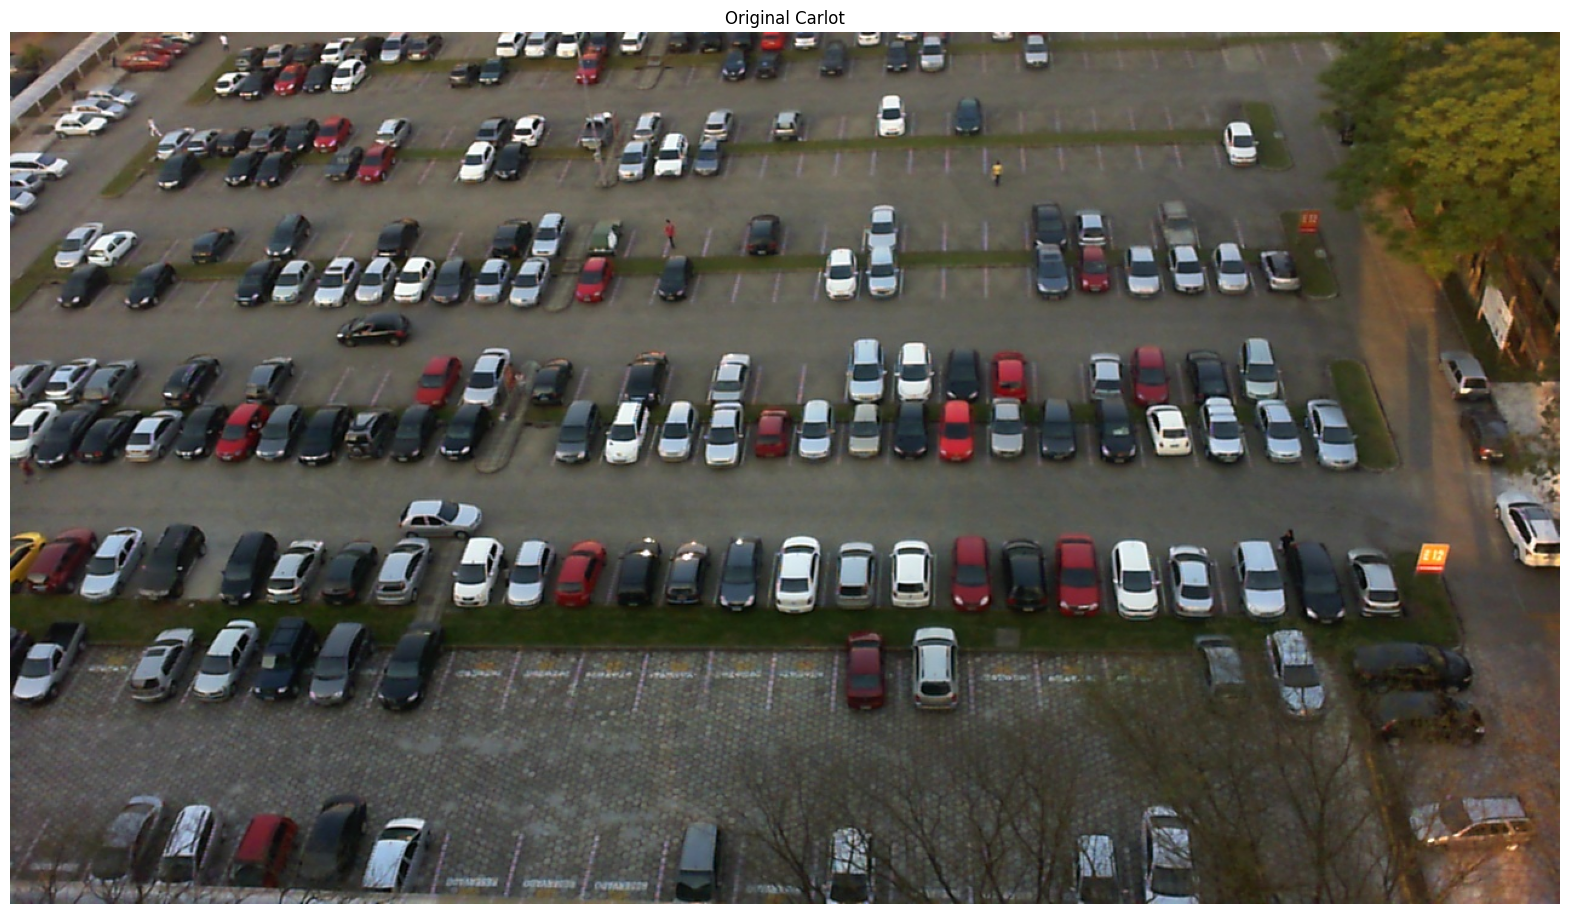

In [35]:
# Original image
show_image(img_rgb, title='Original Carlot')

In [36]:
# Display the image with bounding boxes
show_image(img_rgb_cont, title='Annotated Carlot')

## Explore CNR-Park_EXT_yolov8-2

In [137]:
CNR_Park_dataset_path = '../data/CNR-Park_EXT_yolov8-2/train/images'
annotation_path = '../data/CNR-Park_EXT_yolov8-2/train/labels'

In [138]:
def draw_boxes(image_path, annotation_file):
    # Read the image
    image = cv2.imread(image_path)

    im_height, im_width, _ = image.shape

    # Open and read the annotation file
    with open(annotation_file, 'r') as file:
        lines = file.readlines()

    # Draw bounding boxes on the image
    for line in lines:
        values = line.strip().split()
        class_label = int(values[0])
        x, y, w, h = map(float, values[1:])
        x, y, w, h = int(x * im_width), int(y * im_height), int(w * im_width), int(h * im_height)

        if class_label == 0:
            # Draw the bounding box
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Save the result
    #cv2.imwrite(output_path, image)
    return image

In [139]:
# Get a list of all files in the folder
all_files = os.listdir(CNR_Park_dataset_path)

# Filter only .jpg files
jpg_files = [file for file in all_files if file.lower().endswith(".jpg")]

# Select a random .jpg file
random_image = random.choice(jpg_files)

# image
path_to_image = os.path.join(CNR_Park_dataset_path,random_image)


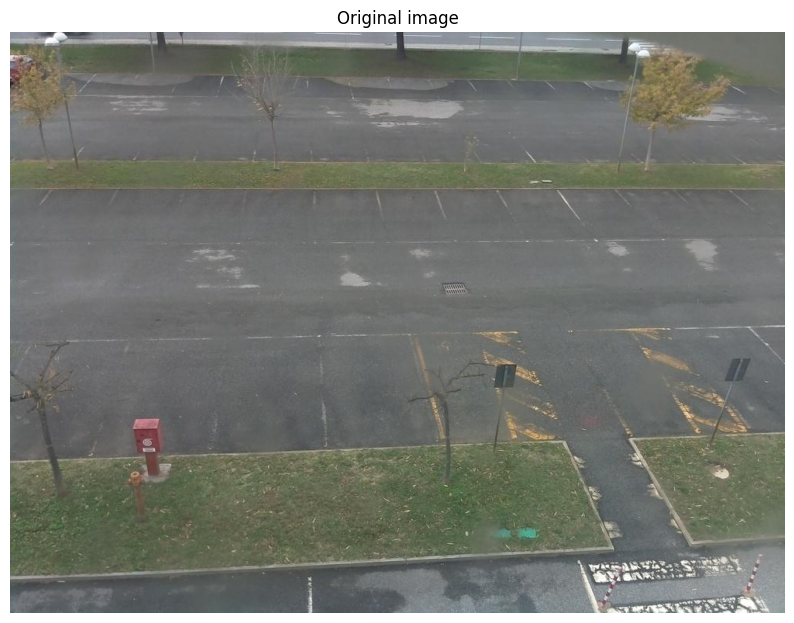

In [140]:
# Read the image with opencv
imgocv = cv2.cvtColor(cv2.imread(path_to_image), cv2.COLOR_BGR2RGB)
show_image(imgocv, title='Original image')

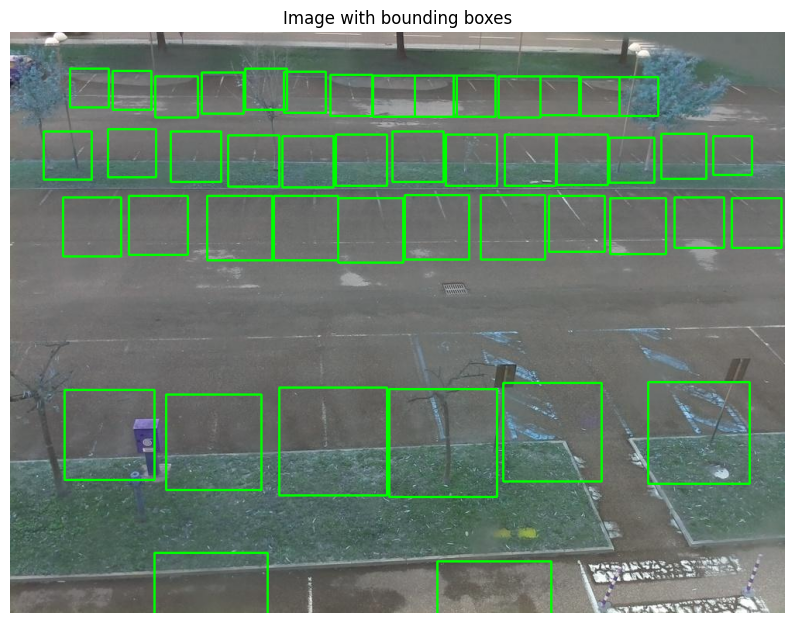

In [141]:
annotation_file = os.path.join(annotation_path, random_image[:-4]+'.txt')

#im_height, im_width, _ = imgocv.shape

gt_image = draw_boxes(path_to_image, annotation_file)
show_image(gt_image, title='Image with bounding boxes')